In [1]:
from feature_selector import *

import pandas as pd
import numpy as np
import seaborn as sns

from scipy.spatial import distance
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [2]:
df_ionizable_train: pd.DataFrame = pd.read_csv("../../Data/ionizable_dataset_72_train_divprio.csv", delimiter=';')
df_ionizable_train["TYPE"] = "TRAIN"
df_ionizable_test: pd.DataFrame = pd.read_csv("../../Data/ionizable_dataset_72_test_divprio.csv", delimiter=';')
df_ionizable_test["TYPE"] = "TEST"

df_ionizable = pd.concat([df_ionizable_train, df_ionizable_test])
FS_ionizable: FeatureSelector = FeatureSelector(df_ionizable, cols_to_ignore=["TYPE"])

# FS_io_train.scale_data(inplace=True)
# FS_io_test.scale_data(inplace=True)


df_neutral_train: pd.DataFrame = pd.read_csv("../../Data/neutral_dataset_111_train_divprio.csv", delimiter=';')
df_neutral_train["TYPE"] = "TRAIN"
df_neutral_test: pd.DataFrame = pd.read_csv("../../Data/neutral_dataset_111_test_divprio.csv", delimiter=';')
df_neutral_test["TYPE"] = "TEST"

df_neutral = pd.concat([df_neutral_train, df_neutral_test])
FS_neutral: FeatureSelector = FeatureSelector(df_neutral, cols_to_ignore=["TYPE"])

# FS_ne_train.scale_data(inplace=True)
# FS_ne_test.scale_data(inplace=True)

df_full_train: pd.DataFrame = pd.read_csv("../../Data/full_dataset_train_divprio.csv", delimiter=';')
df_full_train["TYPE"] = "TRAIN"
df_full_test: pd.DataFrame = pd.read_csv("../../Data/full_dataset_test_divprio.csv", delimiter=';')
df_full_test["TYPE"] = "TEST"

df_full = pd.concat([df_full_train, df_full_test])
FS_full: FeatureSelector = FeatureSelector(df_full, cols_to_ignore=["TYPE"])


# FS_full_train: FeatureSelector = FeatureSelector(df_full_train)
# FS_full_test: FeatureSelector = FeatureSelector(df_full_test)

In [3]:
# FS_full.df[["vsurf_W8", "vsurf_HB8"]]
# dropped = FS_full.remove_highly_correlated(verbose=True)

Stats=  3.2222088117322376 
p=  0.19966697887942364
Gaussian


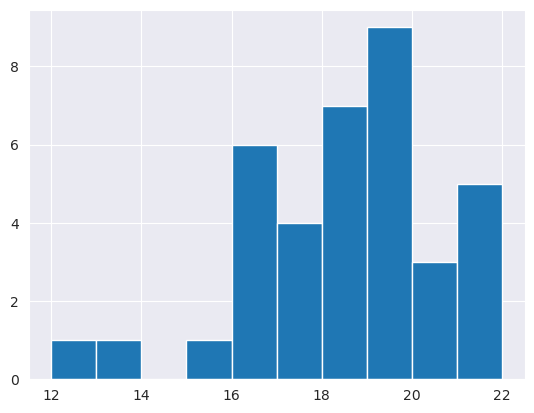

In [4]:
# Test de normalité
from scipy.stats import shapiro, normaltest
from matplotlib import pyplot


data = df_full_test.iloc[:,14]

stat, p = normaltest(data)

print("Stats= ", stat, "\np= ", p)
alpha = 0.05


if p > alpha:
    print("Gaussian")
else:
    print("Not gaussian")


pyplot.hist(data)
pyplot.show()

# Low variance features
We try to detect every feature that has a variance below the threshold

## IONIZABLE

In [5]:
print("Before low variance removal: ", df_ionizable.shape)
df_ionizable_lv, col_ionizable_lv = FS_ionizable.remove_low_variance(variance_threshold=0, cols_to_ignore=["TYPE"], inplace=True)
print(col_ionizable_lv)
print("length of the feature with low variance that are common for train and test: ", len(col_ionizable_lv))

df_ionizable = df_ionizable.drop(list(col_ionizable_lv), axis=1)
print("After low variance removal: ", df_ionizable.shape)

Before low variance removal:  (72, 480)
['a_nB', 'a_nBr', 'a_nI', 'a_nP', 'E_stb', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-17)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-21)', 'MACCS(-23)', 'MACCS(-26)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-44)', 'MACCS(-46)', 'MACCS(-48)', 'MACCS(-49)', 'MACCS(-68)', 'MACCS(-69)', 'MACCS(166)', 'nmol', 'vsurf_Wp8']
length of the feature with low variance that are common for train and test:  39
After low variance removal:  (72, 441)


## NEUTRAL

In [6]:
print("Before low variance removal: ", df_neutral.shape)
df_neutral_lv, col_neutral_lv = FS_neutral.remove_low_variance(variance_threshold=0, cols_to_ignore=["TYPE"], inplace=True)
print(col_neutral_lv)
print("length of the feature with low variance that are common for train and test: ", len(col_neutral_lv))

df_neutral = df_neutral.drop(list(col_neutral_lv), axis=1)
print("After low variance removal: ", df_neutral.shape)

Before low variance removal:  (111, 480)
['a_nB', 'a_nI', 'a_nP', 'E_stb', 'FCharge', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-13)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-24)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-34)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-41)', 'MACCS(-44)', 'MACCS(-48)', 'MACCS(-49)', 'MACCS(-68)', 'MACCS(166)', 'nmol']
length of the feature with low variance that are common for train and test:  36
After low variance removal:  (111, 444)


## FULL

In [7]:
print("Before low variance removal: ", df_full.shape)
df_full_lv, col_full_lv = FS_full.remove_low_variance(variance_threshold=0, cols_to_ignore=["TYPE"], inplace=True)
print(col_full_lv)
print("length of the feature with low variance that are common for train and test: ", len(col_full_lv))
df_full = df_full.drop(list(col_full_lv), axis=1)
print("After low variance removal: ", df_full.shape)

Before low variance removal:  (183, 480)
['a_nB', 'a_nI', 'a_nP', 'E_stb', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-44)', 'MACCS(-48)', 'MACCS(-68)', 'MACCS(166)', 'nmol']
length of the feature with low variance that are common for train and test:  30
After low variance removal:  (183, 450)


# Detect binary data

In [8]:
from sklearn.feature_selection import VarianceThreshold

dfs: dict = {
    "ionizable": df_ionizable.loc[:, df_ionizable.isin([0,1]).all()],
    "neutral": df_neutral.loc[:, df_neutral.isin([0,1]).all()],
    "full": df_full.loc[:, df_full.isin([0,1]).all()]
}


for key, value in dfs.items():
    suspect_cols = []
    for i in range(value.shape[1]):
        aled = value[value.columns[i]].value_counts()
        percentage = aled.min() / aled.sum() * 100
        if (percentage < 1).any():
            suspect_cols.append(aled)
    print("===== ", key, " =====")
    print(suspect_cols)


=====  ionizable  =====
[]
=====  neutral  =====
[b_triple
0    110
1      1
Name: count, dtype: int64, MACCS(--8)
0    110
1      1
Name: count, dtype: int64, MACCS(-16)
0    110
1      1
Name: count, dtype: int64, MACCS(-21)
0    110
1      1
Name: count, dtype: int64, MACCS(-23)
0    110
1      1
Name: count, dtype: int64]
=====  full  =====
[MACCS(-13)
0    182
1      1
Name: count, dtype: int64, MACCS(-21)
0    182
1      1
Name: count, dtype: int64, MACCS(-23)
0    182
1      1
Name: count, dtype: int64, MACCS(-34)
0    182
1      1
Name: count, dtype: int64]


# High correlation feature

## IONIZABLE

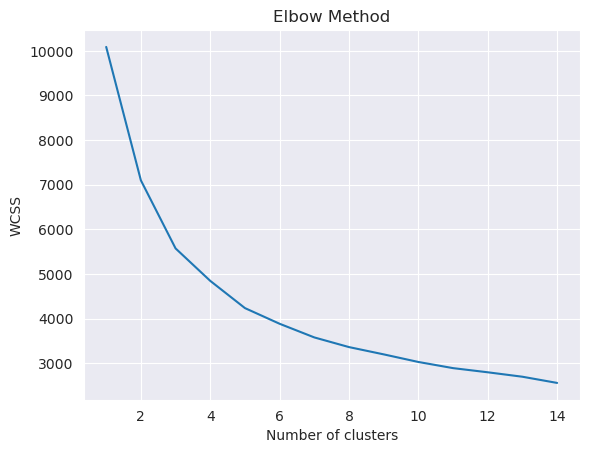

In [9]:
df_io_corr = FS_ionizable.get_correlation()
corr_feat_mtx = df_io_corr.to_numpy()


# Determine optimun number of clusters for kmeans
wcss = []
max_num_clusters = 15
for i in range(1, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(corr_feat_mtx)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_num_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

439
439


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

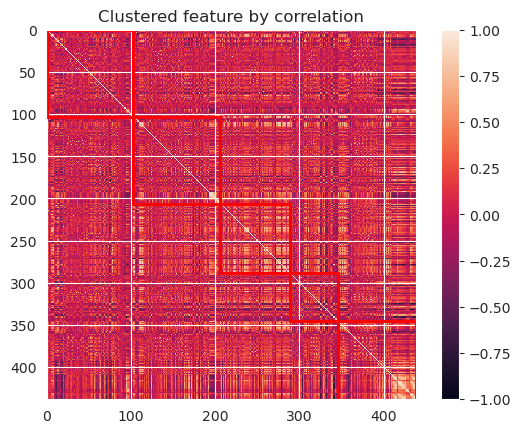

In [10]:
display_data_cluster(df_corr=df_io_corr, n_clusters=5)

Before high correlation removal:  (72, 441)
[[3.30000000e+01 5.40000000e+01 0.00000000e+00 2.00000000e+00]
 [6.00000000e+00 7.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.20000000e+01 5.60000000e+01 0.00000000e+00 2.00000000e+00]
 [4.40000000e+01 5.90000000e+01 0.00000000e+00 2.00000000e+00]
 [1.20000000e+01 1.50000000e+01 0.00000000e+00 2.00000000e+00]
 [1.60000000e+01 1.00000000e+02 0.00000000e+00 3.00000000e+00]
 [1.80000000e+01 1.01000000e+02 0.00000000e+00 4.00000000e+00]
 [1.90000000e+01 1.02000000e+02 0.00000000e+00 5.00000000e+00]
 [9.00000000e+00 1.00000000e+01 0.00000000e+00 2.00000000e+00]
 [1.30000000e+01 1.04000000e+02 0.00000000e+00 3.00000000e+00]
 [8.50000000e+01 9.20000000e+01 0.00000000e+00 2.00000000e+00]
 [1.40000000e+01 1.70000000e+01 0.00000000e+00 2.00000000e+00]
 [4.50000000e+01 5.10000000e+01 2.37937206e-02 2.00000000e+00]
 [6.40000000e+01 1.08000000e+02 3.42917528e-02 3.00000000e+00]
 [4.20000000e+01 6.70000000e+01 4.30528376e-02 2.00000000e+00]
 [9.5000000

After high correlation removal:  (72, 345)


Index(['ASA', 'E_nb', 'FASA-', 'FASA_H', 'FCharge', 'GCUT_SLOGP_0',
       'MACCS(--8)', 'MACCS(-11)', 'MACCS(-16)', 'MACCS(-32)', 'MACCS(-33)',
       'MACCS(-50)', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-56)', 'MACCS(-60)',
       'MACCS(-61)', 'MACCS(-63)', 'MACCS(-67)', 'MACCS(-73)', 'MACCS(-81)',
       'MACCS(-83)', 'MACCS(-88)', 'MACCS(-92)', 'MACCS(117)', 'MACCS(119)',
       'MACCS(124)', 'MACCS(134)', 'MACCS(138)', 'MACCS(146)', 'MACCS(148)',
       'MACCS(159)', 'MACCS(160)', 'MACCS(161)', 'PC+', 'PC-', 'PEOE_VSA_FHYD',
       'PEOE_VSA_FNEG', 'Q_RPC+', 'Q_RPC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG', 'SMR',
       'VAdjEq', 'VAdjMa', 'VDistMa', 'VSA', 'Weight', 'a_acid', 'a_count',
       'a_donacc', 'a_heavy', 'a_nCl', 'a_nF', 'a_nN', 'a_nO', 'a_nS', 'apol',
       'b_ar', 'b_heavy', 'b_rotN', 'b_triple', 'chi0_C', 'chi0v_C', 'chi1',
       'diameter', 'h_pstrain', 'mr', 'opr_brigid', 'opr_nring', 'petitjean',
       'pmi2', 'pmi3', 'radius', 'vdw_area', 'vdw_vol', 'vol', 'vsurf_CW6',
  

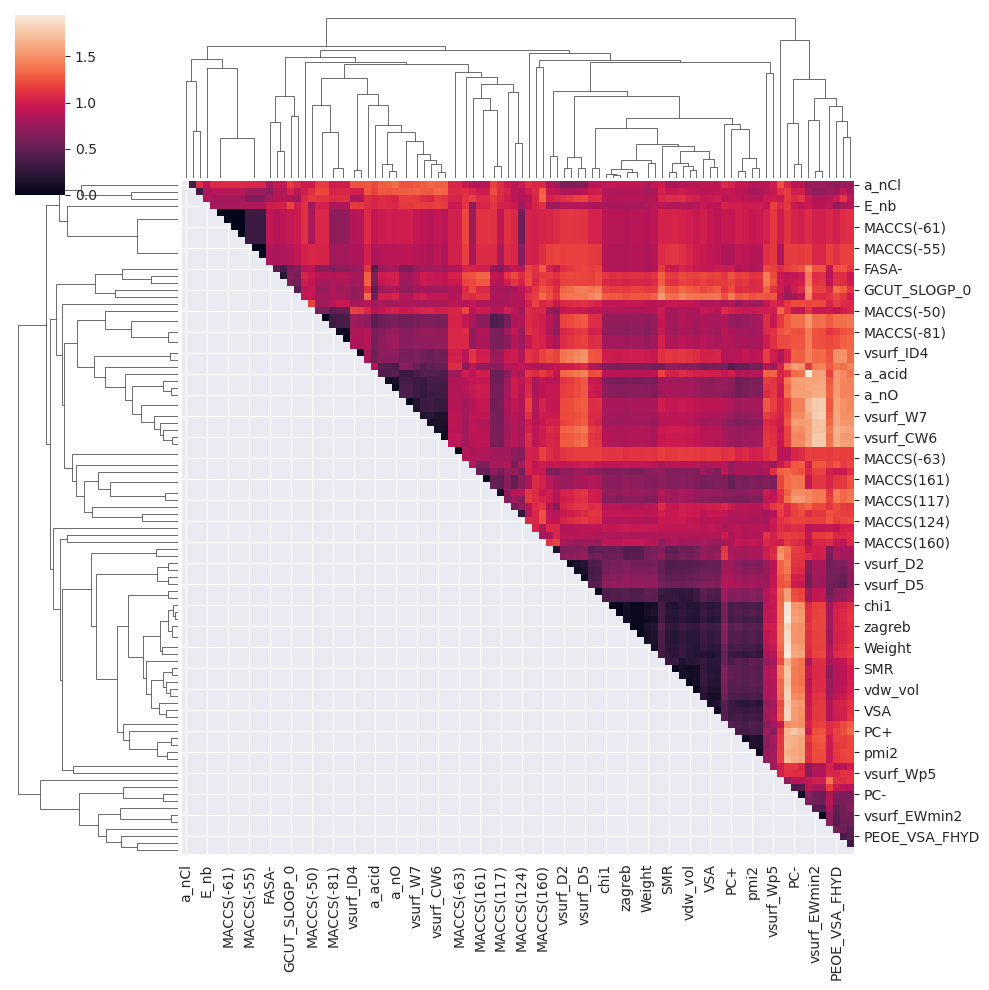

In [11]:
print("Before high correlation removal: ", df_ionizable.shape)
df_ionizable_correlation_removed = FS_ionizable.remove_highly_correlated(graph=True)
print("After high correlation removal: ", df_ionizable_correlation_removed.shape)
df_ionizable[df_ionizable.columns.difference(df_ionizable_correlation_removed.columns)].columns

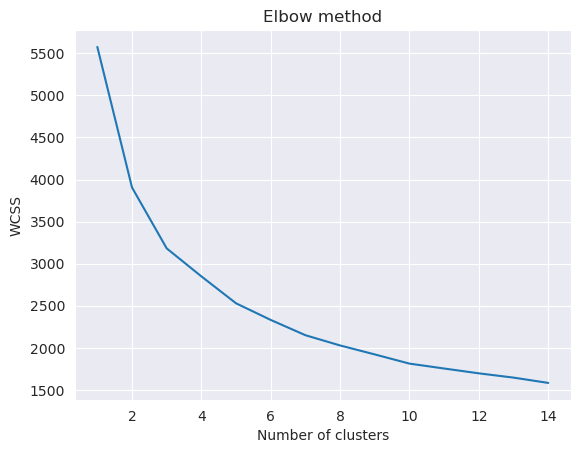

343
343


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

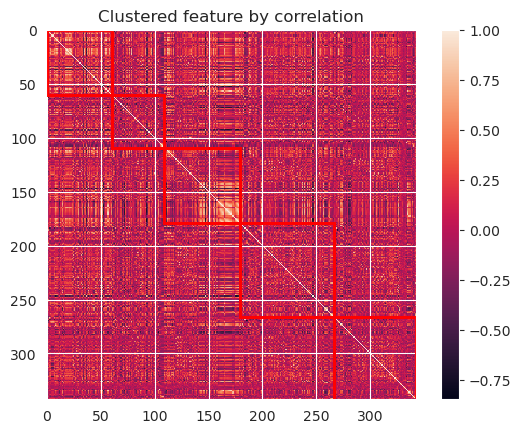

In [12]:
df_io_corr = FS_ionizable.get_correlation(df_ionizable_correlation_removed)

display_elbow(df_io_corr)
display_data_cluster(df_corr=df_io_corr, n_clusters=5)

## Neutral

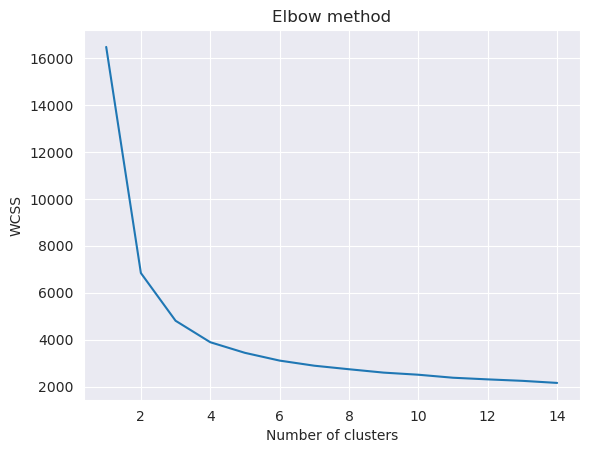

442
442


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

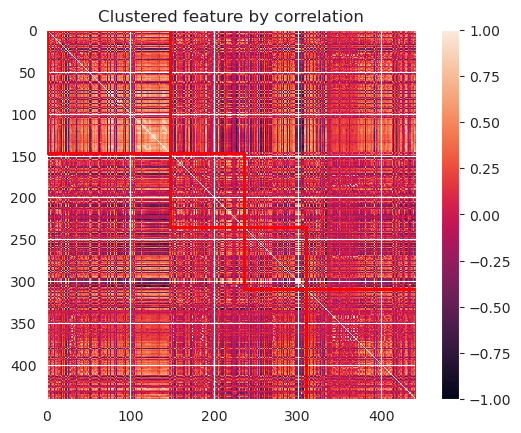

In [13]:
df_ne_corr = FS_neutral.get_correlation()
display_elbow(df_ne_corr)
display_data_cluster(df_corr=df_ne_corr, n_clusters=4)

Before high correlation removal:  (111, 444)
[[4.90000000e+01 6.60000000e+01 0.00000000e+00 2.00000000e+00]
 [9.00000000e+00 1.00000000e+01 0.00000000e+00 2.00000000e+00]
 [2.70000000e+01 3.50000000e+01 0.00000000e+00 2.00000000e+00]
 [5.20000000e+01 5.40000000e+01 0.00000000e+00 2.00000000e+00]
 [1.10000000e+01 1.40000000e+01 1.11022302e-16 2.00000000e+00]
 [1.50000000e+01 1.15000000e+02 1.11022302e-16 3.00000000e+00]
 [2.60000000e+01 6.00000000e+01 1.11022302e-16 2.00000000e+00]
 [7.20000000e+01 1.16000000e+02 5.57107399e-03 4.00000000e+00]
 [8.40000000e+01 9.90000000e+01 1.92999054e-02 2.00000000e+00]
 [1.70000000e+01 2.10000000e+01 2.23994242e-02 2.00000000e+00]
 [8.60000000e+01 1.06000000e+02 2.65624070e-02 2.00000000e+00]
 [9.40000000e+01 9.50000000e+01 2.71908272e-02 2.00000000e+00]
 [5.60000000e+01 1.11000000e+02 3.22995212e-02 3.00000000e+00]
 [8.50000000e+01 1.00000000e+02 3.37490829e-02 2.00000000e+00]
 [8.80000000e+01 8.90000000e+01 3.51494997e-02 2.00000000e+00]
 [2.000000

After high correlation removal:  (111, 333)


Index(['ASA', 'ASA_H', 'ASA_P', 'BCUT_SMR_0', 'CASA+', 'FASA-', 'FASA_H',
       'FASA_P', 'Kier1', 'MACCS(-32)', 'MACCS(-33)', 'MACCS(-51)',
       'MACCS(-55)', 'MACCS(-56)', 'MACCS(-60)', 'MACCS(-61)', 'MACCS(-73)',
       'MACCS(-76)', 'MACCS(-81)', 'MACCS(-85)', 'MACCS(-87)', 'MACCS(-99)',
       'MACCS(107)', 'MACCS(110)', 'MACCS(118)', 'MACCS(158)', 'MACCS(161)',
       'PC+', 'PC-', 'PEOE_PC+', 'PEOE_VSA_FHYD', 'PEOE_VSA_FNEG',
       'PEOE_VSA_FPNEG', 'PEOE_VSA_FPPOS', 'PEOE_VSA_PNEG', 'Q_PC+', 'Q_RPC+',
       'Q_RPC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG', 'Q_VSA_FPNEG', 'Q_VSA_FPOL',
       'Q_VSA_FPOS', 'Q_VSA_FPPOS', 'Q_VSA_NEG', 'Q_VSA_PNEG', 'Q_VSA_POS',
       'TPSA', 'VAdjEq', 'VAdjMa', 'VSA', 'a_acc', 'a_acid', 'a_aro', 'a_base',
       'a_count', 'a_heavy', 'a_nBr', 'a_nCl', 'a_nF', 'a_nN', 'a_nO', 'a_nS',
       'apol', 'b_1rotN', 'b_1rotR', 'b_heavy', 'b_triple', 'chi0', 'chi0_C',
       'h_logP', 'h_logS', 'h_log_dbo', 'h_mr', 'h_pstates', 'mr',
       'opr_brigid', 'opr_n

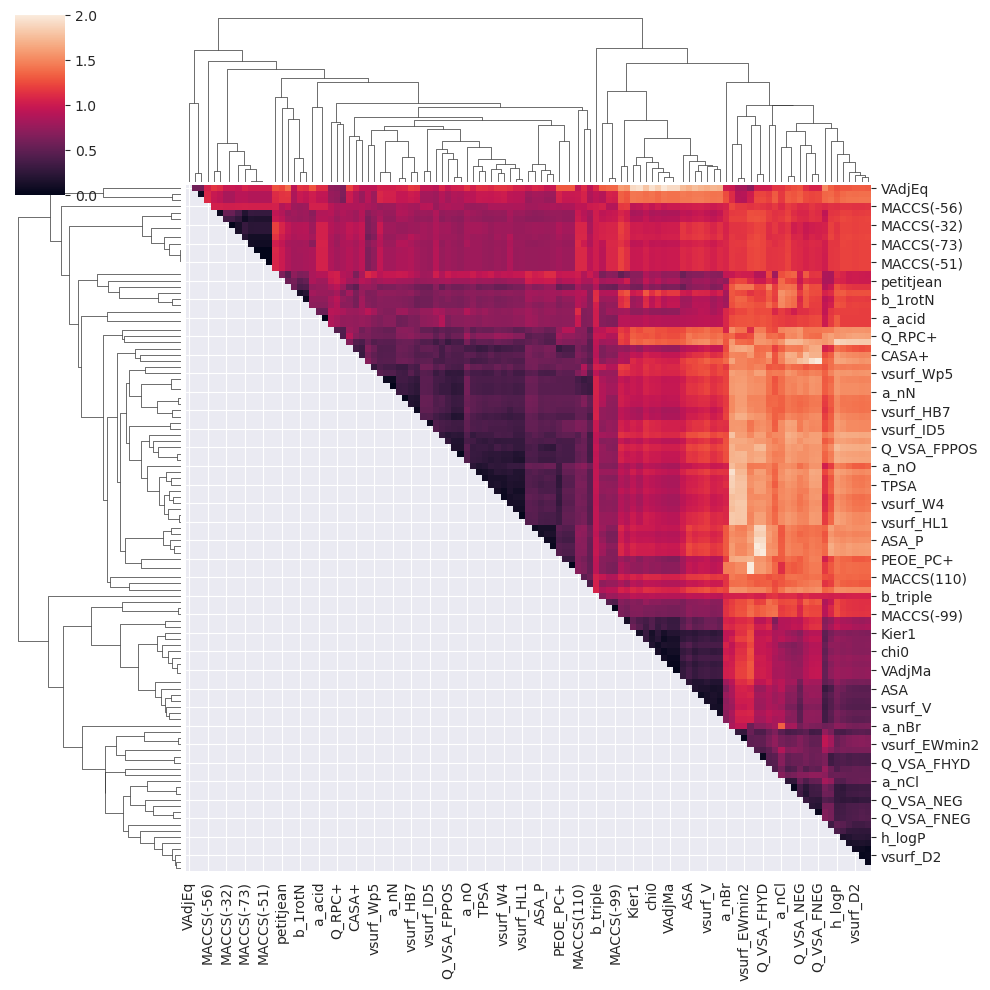

In [14]:
print("Before high correlation removal: ", df_neutral.shape)
df_neutral_correlation_removed = FS_neutral.remove_highly_correlated(graph=True)
print("After high correlation removal: ", df_neutral_correlation_removed.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_seq_items', None):  # more options can be specified also
    display(df_neutral[df_neutral.columns.difference(df_neutral_correlation_removed.columns)].columns)

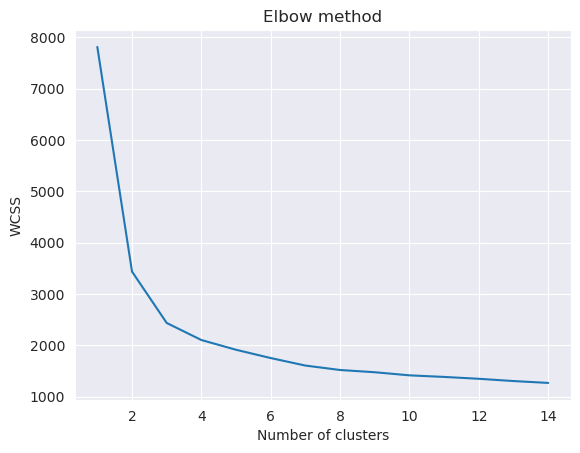

In [15]:
df_ne_corr = FS_neutral.get_correlation(df_neutral_correlation_removed)

display_elbow(df_ne_corr)

343
343


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

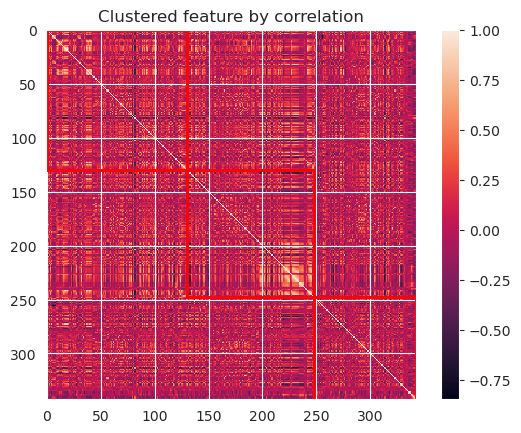

In [16]:
display_data_cluster(df_corr=df_io_corr, n_clusters=3)

## Full

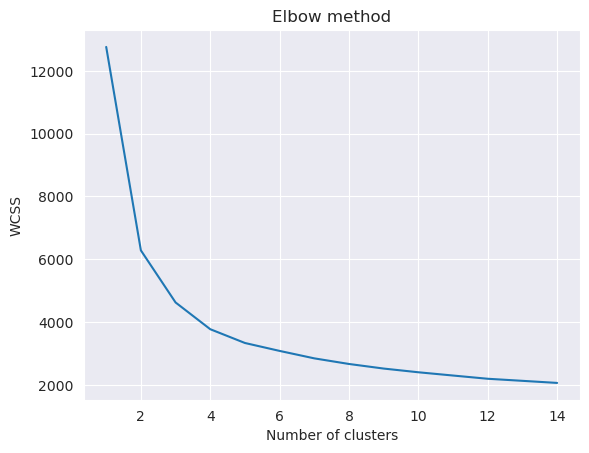

In [17]:
df_full_corr = FS_full.get_correlation()
display_elbow(df_full_corr)

448
448


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

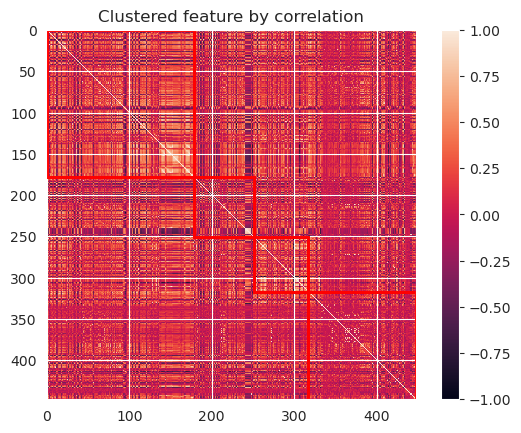

In [18]:
display_data_cluster(df_corr=df_full_corr, n_clusters=4)

Before high correlation removal:  (183, 450)
[[2.20000000e+01 4.60000000e+01 0.00000000e+00 2.00000000e+00]
 [1.60000000e+01 4.80000000e+01 0.00000000e+00 2.00000000e+00]
 [2.30000000e+01 4.70000000e+01 0.00000000e+00 2.00000000e+00]
 [3.60000000e+01 5.10000000e+01 1.11022302e-16 2.00000000e+00]
 [8.00000000e+00 1.10000000e+01 2.22044605e-16 2.00000000e+00]
 [1.20000000e+01 9.50000000e+01 2.22044605e-16 3.00000000e+00]
 [1.30000000e+01 9.60000000e+01 2.22044605e-16 4.00000000e+00]
 [7.90000000e+01 8.70000000e+01 5.48441057e-05 2.00000000e+00]
 [5.50000000e+01 9.70000000e+01 6.00365642e-03 5.00000000e+00]
 [6.80000000e+01 8.00000000e+01 2.37478684e-02 2.00000000e+00]
 [7.60000000e+01 7.70000000e+01 2.58211734e-02 2.00000000e+00]
 [3.70000000e+01 4.20000000e+01 3.34543011e-02 2.00000000e+00]
 [6.90000000e+01 8.10000000e+01 4.02127195e-02 2.00000000e+00]
 [9.40000000e+01 1.02000000e+02 4.67477191e-02 4.00000000e+00]
 [7.20000000e+01 7.30000000e+01 5.33745794e-02 2.00000000e+00]
 [1.900000

After high correlation removal:  (183, 359)


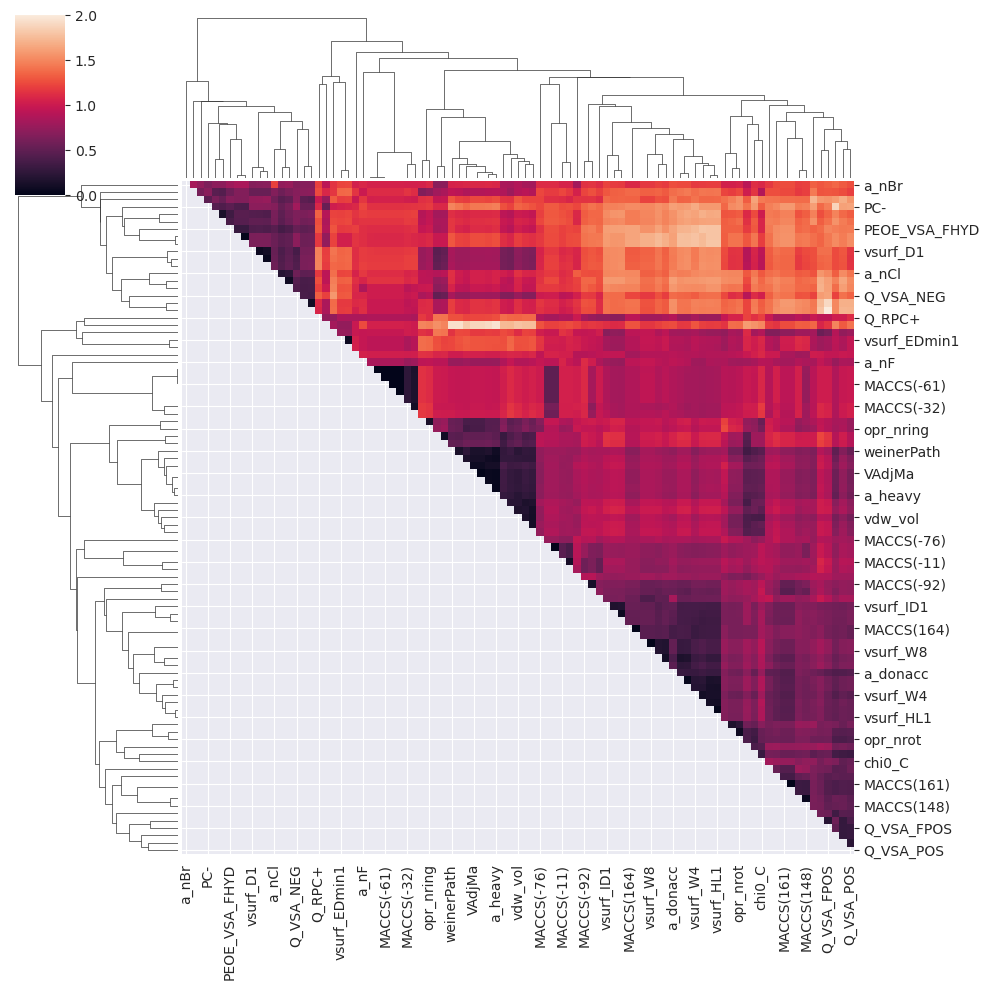

In [19]:
print("Before high correlation removal: ", df_full.shape)
df_full_correlation_removed = FS_full.remove_highly_correlated(graph=True)
print("After high correlation removal: ", df_full_correlation_removed.shape)

In [20]:
df_full[df_full.columns.difference(df_full_correlation_removed.columns)].columns

Index(['BCUT_PEOE_3', 'BCUT_SMR_0', 'FASA+', 'FASA_H', 'FCASA+', 'MACCS(-11)',
       'MACCS(-32)', 'MACCS(-47)', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-56)',
       'MACCS(-60)', 'MACCS(-61)', 'MACCS(-67)', 'MACCS(-76)', 'MACCS(-87)',
       'MACCS(-88)', 'MACCS(-92)', 'MACCS(117)', 'MACCS(122)', 'MACCS(134)',
       'MACCS(148)', 'MACCS(161)', 'MACCS(164)', 'PC+', 'PC-', 'PEOE_VSA_FHYD',
       'PEOE_VSA_FNEG', 'Q_RPC+', 'Q_RPC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG',
       'Q_VSA_FPOS', 'Q_VSA_NEG', 'Q_VSA_POS', 'VAdjEq', 'VAdjMa', 'VDistMa',
       'a_acid', 'a_aro', 'a_count', 'a_donacc', 'a_heavy', 'a_nBr', 'a_nCl',
       'a_nF', 'a_nN', 'a_nO', 'a_nS', 'b_1rotN', 'b_1rotR', 'b_heavy', 'chi0',
       'chi0_C', 'diameter', 'h_log_dbo', 'h_pstrain', 'mr', 'opr_brigid',
       'opr_nring', 'opr_nrot', 'petitjean', 'pmi', 'pmi2', 'vdw_area',
       'vdw_vol', 'vol', 'vsurf_CW4', 'vsurf_CW5', 'vsurf_CW6', 'vsurf_CW7',
       'vsurf_D1', 'vsurf_D3', 'vsurf_D4', 'vsurf_EDmin1', 'vsurf_EDmin2',
   

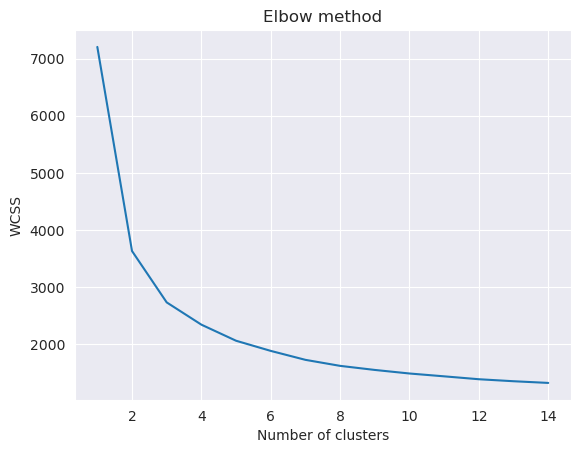

343
343


/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

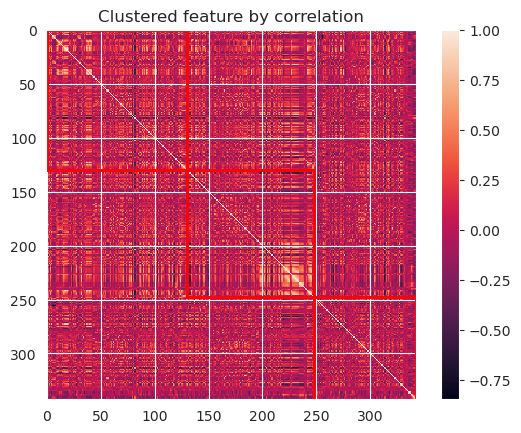

In [24]:
df_full_corr = FS_full.get_correlation(df_full_correlation_removed)
display_elbow(df_full_corr)
display_data_cluster(df_corr=df_io_corr, n_clusters=3)

# Proof of concept of the **transform** method

In [21]:
# Loading the data and putting it in a FeatureSelector object
df_full_train: pd.DataFrame = pd.read_csv("../../Data/full_dataset_train_divprio.csv", delimiter=';')
df_full_train["TYPE"] = "TRAIN"
df_full_test: pd.DataFrame = pd.read_csv("../../Data/full_dataset_test_divprio.csv", delimiter=';')
df_full_test["TYPE"] = "TEST"

df_full = pd.concat([df_full_train, df_full_test])
FS_full: FeatureSelector = FeatureSelector(df_full, cols_to_ignore=["TYPE"])

In [22]:
# Calling the automatic selection function
final_df: pd.DataFrame = FS_full.transform()

In [23]:
final_df.equals(df_full_correlation_removed)

True